In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from joblib import dump
from sklearn.svm import SVC
import matplotlib.cm as cm
import numpy as np

In [2]:

dataset = pd.read_pickle("clean_data")
print(dataset)

          age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0    0.952197  0.763956 -0.256334  0.015443  1.087338       1      0      1   
1   -1.915313 -0.092738  0.072199  1.633471  2.122573       1      0      1   
2   -1.474158 -0.092738 -0.816773  0.977514  0.310912       1      1      0   
3    0.180175 -0.663867 -0.198357  1.239897 -0.206705       1      0      1   
4    0.290464 -0.663867  2.082050  0.583939 -0.379244       1      1      0   
..        ...       ...       ...       ...       ...     ...    ...    ...   
298  0.290464  0.478391 -0.101730 -1.165281 -0.724323       0      1      0   
299 -1.033002 -1.234996  0.342756 -0.771706  0.138373       0      0      1   
300  1.503641  0.706843 -1.029353 -0.378132  2.036303       0      0      1   
301  0.290464 -0.092738 -2.227533 -1.515125  0.138373       0      0      1   
302  0.290464 -0.092738 -0.198357  1.064975 -0.896862       0      1      0   

     cp_0  cp_1  ...  slope_2  ca_0  ca_1  ca_2  ca

In [3]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


In [4]:

svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))


Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

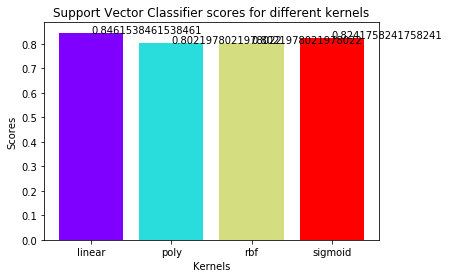

In [5]:
colors = cm.rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')


In [6]:

print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

The score for Support Vector Classifier is 84.61538461538461% with linear kernel.


In [8]:
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train,y_train)
svc_classifier.score(X_test,y_test)

0.8461538461538461

In [9]:
dump(svc_classifier, 'SVC_linear_classifier.jobliz.z')

['SVC_linear_classifier.jobliz.z']